<a href="https://colab.research.google.com/github/smaciasg/Ejercicios_DataScience_Coding_Dojo/blob/main/KNN_de_pr%C3%A1ctica_preprocesamiento_de_abalones_(base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESCRIPCIÓN EJERCICIO**

Utilicen el conjunto de datos de abalón para predecir el sexo a partir de sus características usando KNN



#**TAREA**

1) ¿Esto es un conjunto de datos balanceado?

2) Asegúrense de escalar los datos (intenten usar el pipeline)

3) ¿Cuál es la exactitud del modelo por defecto?

4) ¿Cuál es la exactitud óptima que pueden alcanzar al ajustar el valor k usando KNN?

5) Creen una matriz de confusión para el modelo KNN óptimo.

####**1) Llamar las librerías necesarias**

In [59]:
import pandas as pd
import numpy as np
#Librerías para preprocesamiento
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
#Librería para el modelo KNN
from sklearn.neighbors import KNeighborsClassifier
#Librería para las métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#Para optimizar
from sklearn.model_selection import GridSearchCV

####**2) Importar los datos y explorarlos**

In [29]:
data_abalones = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 5 - INTRO APRENDIZAJE AUTOMÁTICO ML/abalone.data', names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
data_abalones

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [30]:
data_abalones.info()
#No hay datos faltantes que imputar y solo sería necesario escalar los datos y transformar la columna de sexo a valores enteros, pues es la columna objetivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [31]:
data_abalones.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

####**3) Crear matriz de características y vector objetivo**

Dado que la columna objetivo es el sexo y de acuerdo a la descripción del dataset se sabe que M, F, and I (infant), se procede a clasificar cada una de las categorías así:
M: 0
F: 1
I: 2

In [32]:
#Cambio de las categorías de las columna de sexo antes de la segmentación del dataframe
data_abalones['Sex'] = data_abalones['Sex'].replace({'M':0,'F':1,'I':2})

In [33]:
X = data_abalones.drop(columns = 'Sex')
y = data_abalones['Sex']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [34]:
y.value_counts(normalize=True)

0    0.365813
2    0.321283
1    0.312904
Name: Sex, dtype: float64

***PREGUNTA***:

1) ¿Esto es un conjunto de datos balanceado?

R/ Sí, se observa que para cada una de las categorías de sexo el % de datos es similar, pocentualmente no supera el6 % la diferencia entre los datos del masculino y el femenino

####**4) Instanciar los transformadores numéricos y el modelo**

In [35]:
# Transformador numérico
scaler = StandardScaler()
knn_abalones = KNeighborsClassifier() #Se usa el modelo por defecto para calcular su exactitud

####**5) Instanciar el pipeline**

In [36]:
#El pipeline recibirá los transformadores y el modelo, es importante el orden, primero los transformadores y luego el modelo
knn_pipe = make_pipeline(scaler,knn_abalones)
knn_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

####**6) Ajustar el modelo a los datos de entrenamiento**

In [37]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

####**7) Predecir los valores**

In [56]:
knn_abalones_pred = knn_pipe.predict(X_test)
knn_abalones_pred

array([1, 0, 0, ..., 1, 2, 2])

####**8) Evaluar la exactitud del modelo**

***PREGUNTA**:

3) ¿Cuál es la exactitud del modelo por defecto?

In [45]:
score_knn = knn_pipe.score(X_test,y_test)
score_knn

0.5444976076555024

In [44]:
print(classification_report(y_test,knn_abalones_pred))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51       379
           1       0.41      0.38      0.40       316
           2       0.75      0.69      0.72       350

    accuracy                           0.54      1045
   macro avg       0.55      0.54      0.54      1045
weighted avg       0.55      0.54      0.55      1045



###**9) ¿Cuál es la exactitud óptima que pueden alcanzar al ajustar el valor k usando KNN?**

In [60]:
knn_abalones.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [136]:
grid_param_knn = {'n_neighbors':[1,10,100]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'n_neighbors': 10}

In [137]:
grid_param_knn = {'n_neighbors':[10,50,90]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'n_neighbors': 50}

In [138]:
grid_param_knn = {'n_neighbors':[40,50,60]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'n_neighbors': 40}

In [139]:
grid_param_knn = {'n_neighbors':[30,40,50]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'n_neighbors': 30}

In [140]:
grid_param_knn = {'n_neighbors':[20,30,40]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

{'n_neighbors': 30}

In [141]:
grid_param_knn = {'n_neighbors':[25,30,35]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [142]:
grid_param_knn = {'n_neighbors':[15,25,30,40,50]}
grid_knn = GridSearchCV(knn_abalones,grid_param_knn, cv=5)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=25)

**Correr modelo con k entre 25 y 50**

In [162]:
mejor_score = []
lista_optimo = {}
for k_param in range(25,51):
  scaler = StandardScaler()
  knn_abalones = KNeighborsClassifier(n_neighbors=k_param)
  knn_pipe = make_pipeline(scaler,knn_abalones)
  knn_pipe.fit(X_train,y_train)
  knn_abalones_pred = knn_pipe.predict(X_test)
  score_knn = knn_pipe.score(X_test,y_test)
  mejor_score.append(score_knn)
  lista_optimo[score_knn] = k_param

In [163]:
#Valor óptimo de la vecinos es
val_kn_optimo = lista_optimo.get(max(mejor_score))
val_kn_optimo

34

In [164]:
scaler = StandardScaler()
knn_abalones = KNeighborsClassifier(n_neighbors=val_kn_optimo)
knn_pipe = make_pipeline(scaler,knn_abalones)
knn_pipe.fit(X_train,y_train)
knn_abalones_pred = knn_pipe.predict(X_test)
score_knn = knn_pipe.score(X_test,y_test)
score_knn

0.5770334928229665

###**10) Creen una matriz de confusión para el modelo KNN óptimo.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


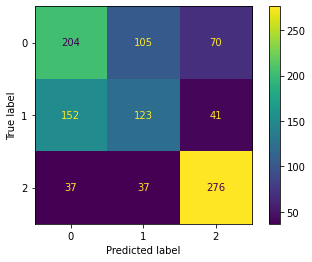

In [165]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(knn_pipe,X_test,y_test)